<a href="https://colab.research.google.com/github/Thareqky/Data-Analytics-Portfolio/blob/main/RevoU_FSDA_Python_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Preparation

In [ ]:
# importing library
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7

# Importing Data

In [ ]:
# importing user information dataset and getting genereal info of the dataset
user_url = 'https://docs.google.com/spreadsheets/d/1k6Vh8iCFlRZDOssyIymmg4wUXWpjVq7k4nJQ0t2GNsQ/edit#gid=1571066353'
user_csv = user_url.replace('/edit#gid=', '/export?format=csv&gid=')
user = pd.read_csv(user_csv, parse_dates = ['registration_import_datetime'], infer_datetime_format=True)
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   referral_code_used            5604 non-null   object        
 7   user_income_source            14712 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 919.6+ KB


In [ ]:
# importing daily user balance dataset and getting genereal info of the dataset
daily_balance = 'https://docs.google.com/spreadsheets/d/1QW7TjZw5AfR12sgr7qGklz4K-7SUg3YmYnowDHzLWVg/edit#gid=1140797115'
daily_csv = daily_balance.replace('/edit#gid=', '/export?format=csv&gid=')
daily = pd.read_csv(daily_csv, parse_dates = ['date'], infer_datetime_format=True)
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            106292 non-null  float64       
 3   Saham_invested_amount                106292 non-null  float64       
 4   Saham_transaction_amount             100839 non-null  float64       
 5   Pasar_Uang_AUM                       131081 non-null  float64       
 6   Pasar_Uang_invested_amount           131081 non-null  float64       
 7   Pasar_Uang_transaction_amount        124273 non-null  float64       
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64       
 

Based on early info on the datasets all the data type seems to be correct.

## Data Dictionary

User Dataset:
- **user_id** = Client ID on the platform
- **registration_import_datetime** = Registration time and date at UTC+7 timezone (WIB)
- **user_gender** = User self-identified gender
- **user_age** =	User self-identified age
- **user_occupation**	User = self-identified job
- **user_income_range** =	User self-identified income range
- **referral_code_used** =	If user enter referral code during registration, the value is "used referral"; else will be Null valued
- **user_income_source** = User self-declared source of income

Daily User Balance Dataset:
- **user_id** =	Client ID on the platform
- **date** =	Date of the user balance
- **Saham_AUM** =	AUM of equity mutual fund held by client to date
- **Saham_invested_amount**	= The total price paid by client to buy equity mutual fund to date.
- **Saham_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) equity mutual fund on the date. If there's no transaction, the value should be 0 or NA
- **Pasar_Uang_AUM** =	AUM of money market mutual fund held by client to date
- **Pasar_Uang_invested_amount** =	The total price paid by client to buy money market mutual fund to date
- **Pasar_Uang_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) money market mutual fund on the date. If there's no transaction, the value should be 0 or NA
- **Pendapatan_Tetap_AUM** =	AUM of fixed income mutual fund held by client to date
- **Pendapatan_Tetap_invested_amount** =	The total price paid by client to buy fixed income mutual fund to date
- **Pendapatan_Tetap_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) fixed income mutual fund on the date. If there's no transaction, the value should be 0 or NA
- **Campuran_AUM** =	AUM of mixed mutual fund held by client to date
- **Campuran_invested_amount** =	The total price paid by client to buy mixed mutual fund to date
- **Campuran_transaction_amount** =	Total value of transaction to buy (if positive) or sell (if negative) mixed mutual fund on the date. If there's no transaction, the value should be 0 or NA

# Data Cleaning

## Handling Missing Values

User Dataset

In [ ]:
# Check number of null Value in each column
user.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
dtype: int64

In [ ]:
# Modifying refferal code collumn into 1 and 0 since it's categorical
user['use_code'] = user['referral_code_used'].isna().apply(lambda x: 1 if x == False else 0)

In [ ]:
# Dropping referral_code_used column since it's not used anymore
user.drop('referral_code_used', axis=1, inplace = True)

In [ ]:
user.info() # Checking whether there's still null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  object        
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   user_income_source            14712 non-null  object        
 7   use_code                      14712 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 919.6+ KB


Daily User Balance Dataset

In [ ]:
# Check number of NaN Value in each column
daily.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               52519
Saham_invested_amount                   52519
Saham_transaction_amount                57972
Pasar_Uang_AUM                          27730
Pasar_Uang_invested_amount              27730
Pasar_Uang_transaction_amount           34538
Pendapatan_Tetap_AUM                    52865
Pendapatan_Tetap_invested_amount        52865
Pendapatan_Tetap_transaction_amount     58314
Campuran_AUM                           153459
Campuran_invested_amount               153459
Campuran_transaction_amount            153694
dtype: int64

In [ ]:
# Since tdata is either a transaction or a total amount of investment, we can assume that null means no transaction or no amount of invested on each day
daily.fillna(value=0, inplace=True)

In [ ]:
daily.info() # Checking whether there's still null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  float64       
 3   Saham_invested_amount                158811 non-null  float64       
 4   Saham_transaction_amount             158811 non-null  float64       
 5   Pasar_Uang_AUM                       158811 non-null  float64       
 6   Pasar_Uang_invested_amount           158811 non-null  float64       
 7   Pasar_Uang_transaction_amount        158811 non-null  float64       
 8   Pendapatan_Tetap_AUM                 158811 non-null  float64       
 9   Pendapatan_Tetap_invested_amount     158811 non-null  float64       
 

## Checking Duplicated Values


In [ ]:
# Checking duplicated values in user only since the other table is a daily balance data
user.duplicated().sum()

0

## Handling Typo and Unique Values

In [ ]:
# Checking every column in user data for typo and their count
for i in user.drop(columns=list(user.iloc[:,0:2])).columns:
  print(user[i].value_counts(),'\n')

Male      8977
Female    5735
Name: user_gender, dtype: int64 

21    1192
20    1058
23    1031
19     972
22     963
24     901
25     792
18     771
26     744
27     668
28     605
29     553
30     458
31     415
32     346
33     280
17     268
34     262
35     262
36     229
37     194
38     166
39     162
42     143
41     138
40     129
43     107
44      90
49      82
46      81
45      80
48      75
47      68
51      58
52      57
50      48
54      47
53      38
55      34
56      32
57      24
58      15
59      13
60      10
64       9
61       8
62       7
63       6
65       5
67       3
71       3
66       3
69       2
76       1
74       1
73       1
83       1
82       1
Name: user_age, dtype: int64 

Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64 

< 10 Juta                   6275
Rp 10 Juta - 50 Juta     

All of user data look good with no typo, but there's some value count in categorical column that's so few compared with the others. To fix that we'll set a new categories for them:
For user income range, grouping income above 100 mill

In [ ]:
user.loc[user['user_income_range']=='> Rp 100 Juta - 500 Juta','user_income_range'] = '> Rp 100 Juta'
user.loc[user['user_income_range']=='> Rp 500 Juta - 1 Miliar','user_income_range'] = '> Rp 100 Juta'
user.loc[user['user_income_range']=='> Rp 1 Miliar','user_income_range'] = '> Rp 100 Juta'
print(user['user_income_range'].value_counts(),'\n')

< 10 Juta                  6275
Rp 10 Juta - 50 Juta       4816
> Rp 50 Juta - 100 Juta    2390
> Rp 100 Juta              1231
Name: user_income_range, dtype: int64 



## Formatting Data Type

In [ ]:
# Formatting total amount and transaction data from float to integer
for col in list(daily.iloc[:,2:]):
    daily[col] = daily[col].astype(int)

In [ ]:
# Formatting user_id column in both Table to string since they're not used for calculations
# daily['user_id'] = daily['user_id'].astype(str)
# user['user_id'] = daily['user_id'].astype(str)

In [ ]:
# Formatting user_gender column into Category
user['user_gender'] = user['user_gender'].astype('category')

In [ ]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       14712 non-null  int64         
 1   registration_import_datetime  14712 non-null  datetime64[ns]
 2   user_gender                   14712 non-null  category      
 3   user_age                      14712 non-null  int64         
 4   user_occupation               14712 non-null  object        
 5   user_income_range             14712 non-null  object        
 6   user_income_source            14712 non-null  object        
 7   use_code                      14712 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3), object(3)
memory usage: 819.2+ KB


## Merging Data

In [ ]:
# Merge user data with daily user balance to make our final dataset
df = daily.merge(user,how='left',on='user_id')
df

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,use_code
0,50701,2021-08-30,0,0,0,0,0,0,0,0,...,10132277,10000000,0,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
1,50701,2021-08-31,0,0,0,0,0,0,0,0,...,10206945,10000000,0,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
2,50701,2021-09-01,0,0,0,0,0,0,0,0,...,9956556,10000000,0,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
3,50701,2021-09-02,0,0,0,0,0,0,0,0,...,9914858,10000000,0,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
4,50701,2021-09-03,0,0,0,0,0,0,0,0,...,10016360,10000000,0,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,2021-09-28 12:04:25,Male,24,Others,< 10 Juta,Keuntungan Bisnis,1
158807,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,0,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,1
158808,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,0,0,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Dari Suami / istri,0
158809,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158811 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              158811 non-null  int64         
 1   date                                 158811 non-null  datetime64[ns]
 2   Saham_AUM                            158811 non-null  int64         
 3   Saham_invested_amount                158811 non-null  int64         
 4   Saham_transaction_amount             158811 non-null  int64         
 5   Pasar_Uang_AUM                       158811 non-null  int64         
 6   Pasar_Uang_invested_amount           158811 non-null  int64         
 7   Pasar_Uang_transaction_amount        158811 non-null  int64         
 8   Pendapatan_Tetap_AUM                 158811 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     158811 non-null  int64         
 

In [ ]:
# Formatting user_id column in both Table to string since they're not used for calculations
# daily['user_id'] = daily['user_id'].astype(str)
# user['user_id'] = daily['user_id'].astype(str)
# df['user_id'] = df['user_id'].astype(str)

## Handling Outliers

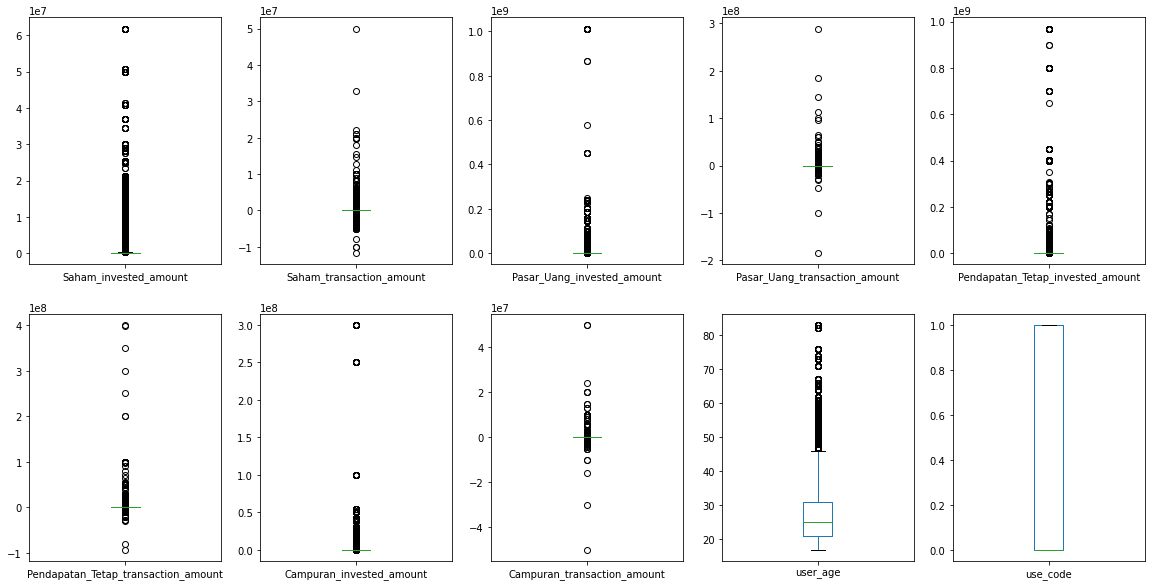

In [ ]:
# Checking every numerical column for outlier
numerical_column = ['Saham_invested_amount','Saham_transaction_amount','Pasar_Uang_invested_amount','Pasar_Uang_transaction_amount',
                    'Pendapatan_Tetap_invested_amount','Pendapatan_Tetap_transaction_amount','Campuran_invested_amount','Campuran_transaction_amount',
                    'user_age','use_code']

fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(20,10))
for i,el in enumerate(numerical_column):
    a = df.boxplot(el, ax=axes.flatten()[i], grid=False)
plt.show()

From the boxplot:
1. We can see that the distribution of the balance data is so spread out between their maximum or minimum point to the boxplot. Even if they made up of only a portion of the data, it will change the result a lot if we remove them. For now we'll keep them in the analysis.
2. There's also a lot of outlier point in the user age data. Let's see how many of them and what's their upper bound.

### Age Outlier

In [ ]:
# Find Q1, Q3, IQR
Q1 = df['user_age'].quantile(0.25)
Q3 = df['user_age'].quantile(0.75)
IQR = Q3 - Q1

# Find Bottom Fence and Upper Fence
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR

#Show the calculation
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 21.0

Q3:
 31.0

IQR:
 10.0

Min:
 6.0

Max:
 46.0


In [ ]:
# Count the number of outlier
df.loc[df['user_age'] > 46].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7270 entries, 553 to 158748
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              7270 non-null   int64         
 1   date                                 7270 non-null   datetime64[ns]
 2   Saham_AUM                            7270 non-null   int64         
 3   Saham_invested_amount                7270 non-null   int64         
 4   Saham_transaction_amount             7270 non-null   int64         
 5   Pasar_Uang_AUM                       7270 non-null   int64         
 6   Pasar_Uang_invested_amount           7270 non-null   int64         
 7   Pasar_Uang_transaction_amount        7270 non-null   int64         
 8   Pendapatan_Tetap_AUM                 7270 non-null   int64         
 9   Pendapatan_Tetap_invested_amount     7270 non-null   int64         
 10  Pendapat

In [ ]:
#Since the outlier count is less than 5% of total data, we can try removing it
df = df.loc[df['user_age'] <= 46]

## Feature Engineering

Let's do some tinkering on the data:
- Do an aggregation based on daily transaction
- Do an aggregation based on end of period

### Daily Dataset

In [ ]:
# Making a daily sum of invested and transaction amount dataset for trend analysis
df_daily = df.groupby('date').sum()
df_daily = df_daily.drop(columns=['user_id','user_age','use_code'])
df_daily.head()

,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
date,,,,,,,,,,,,
2021-08-04,20266582,20120000,0,11833523,11830026,0,9826343,9808300,0,10127908,10000000,0
2021-08-05,30658825,30356600,1430000,25848778,25840034,-470000,32069052,32044366,310000,21198872,21100000,0
2021-08-06,51832737,51610600,3410000,80349254,80321145,1475000,85813659,85801210,3845070,35886361,34700000,0
2021-08-09,75727827,76799492,-1311108,239466912,239508789,-41760000,116817548,116828186,1761976,75049423,73300000,25000000
2021-08-10,89884340,91429486,4959994,86648015,86598504,-173287285,145003416,144999186,4275000,118230902,119400000,0


In [ ]:
#Counting total unique transaction per day for each type of mutual funds
df_daily = df[(df['Saham_transaction_amount'] != 0)].groupby('date').agg({'user_id':pd.Series.nunique}).merge(df_daily,how='right',left_index=True,right_index=True)
df_daily = df_daily.rename({'user_id': 'Saham_trans_count'}, axis=1)
df_daily = df[(df['Pasar_Uang_transaction_amount'] != 0)].groupby('date').agg({'user_id':pd.Series.nunique}).merge(df_daily,how='right',left_index=True,right_index=True)
df_daily = df_daily.rename({'user_id': 'Pasar_Uang_trans_count'}, axis=1)
df_daily = df[(df['Pendapatan_Tetap_invested_amount'] != 0)].groupby('date').agg({'user_id':pd.Series.nunique}).merge(df_daily,how='right',left_index=True,right_index=True)
df_daily = df_daily.rename({'user_id': 'Pendapatan_Tetap_trans_count'}, axis=1)
df_daily = df[(df['Campuran_transaction_amount'] != 0)].groupby('date').agg({'user_id':pd.Series.nunique}).merge(df_daily,how='right',left_index=True,right_index=True)
df_daily = df_daily.rename({'user_id': 'Campuran_trans_count'}, axis=1)
df_daily.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2021-08-04 to 2021-09-30
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Campuran_trans_count                 36 non-null     float64
 1   Pendapatan_Tetap_trans_count         42 non-null     int64  
 2   Pasar_Uang_trans_count               41 non-null     float64
 3   Saham_trans_count                    41 non-null     float64
 4   Saham_AUM                            42 non-null     int64  
 5   Saham_invested_amount                42 non-null     int64  
 6   Saham_transaction_amount             42 non-null     int64  
 7   Pasar_Uang_AUM                       42 non-null     int64  
 8   Pasar_Uang_invested_amount           42 non-null     int64  
 9   Pasar_Uang_transaction_amount        42 non-null     int64  
 10  Pendapatan_Tetap_AUM                 42 non-null     int64  
 11  Pendapatan_Tet

In [ ]:
#Rearranging the collumn
df_daily = df_daily.iloc[:, [4,5,6,3,7,8,9,2,10,11,12,1,13,14,15,0]]

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2021-08-04 to 2021-09-30
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Saham_AUM                            42 non-null     int64  
 1   Saham_invested_amount                42 non-null     int64  
 2   Saham_transaction_amount             42 non-null     int64  
 3   Saham_trans_count                    41 non-null     float64
 4   Pasar_Uang_AUM                       42 non-null     int64  
 5   Pasar_Uang_invested_amount           42 non-null     int64  
 6   Pasar_Uang_transaction_amount        42 non-null     int64  
 7   Pasar_Uang_trans_count               41 non-null     float64
 8   Pendapatan_Tetap_AUM                 42 non-null     int64  
 9   Pendapatan_Tetap_invested_amount     42 non-null     int64  
 10  Pendapatan_Tetap_transaction_amount  42 non-null     int64  
 11  Pendapatan_Tet

In [ ]:
# filling null with 0, formatting type from float to int
df_daily.fillna(value=0, inplace=True)
for col in list(df_daily.iloc[:,[3,7,15]]):
    df_daily[col] = df_daily[col].astype(int)
df_daily.reset_index(drop=False, inplace=True)
df_daily

,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Saham_trans_count,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pasar_Uang_trans_count,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Pendapatan_Tetap_trans_count,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,Campuran_trans_count
0,2021-08-04,20266582,20120000,0,0,11833523,11830026,0,0,9826343,9808300,0,64,10127908,10000000,0,0
1,2021-08-05,30658825,30356600,1430000,5,25848778,25840034,-470000,8,32069052,32044366,310000,125,21198872,21100000,0,0
2,2021-08-06,51832737,51610600,3410000,13,80349254,80321145,1475000,18,85813659,85801210,3845070,193,35886361,34700000,0,0
3,2021-08-09,75727827,76799492,-1311108,27,239466912,239508789,-41760000,27,116817548,116828186,1761976,245,75049423,73300000,25000000,2
4,2021-08-10,89884340,91429486,4959994,29,86648015,86598504,-173287285,35,145003416,144999186,4275000,316,118230902,119400000,0,0
5,2021-08-11,211022782,211716492,7955006,44,430934129,430843361,255642127,58,678740056,678599811,4810030,542,347284185,353242791,12500000,2
6,2021-08-12,210205138,209001954,-2714538,18,426066496,425876721,-4966640,19,674082837,673959485,-4640326,533,348151292,353242791,0,0
7,2021-08-13,255953059,253874954,21708000,36,531866435,531582006,85645285,55,969270186,969354455,258574970,602,429057572,437342791,20000000,2
8,2021-08-16,303609964,302689260,6033028,59,570643924,570176135,6910135,89,1493338434,1492552445,402014390,709,475367497,494442791,8100000,4
9,2021-08-17,334524685,333829327,7210067,37,608848870,608374469,5089334,47,1675954964,1675013553,8221108,788,471755133,490642791,-4000000,1


### End of Period Data


In [ ]:
# Getting EoP amount of AUM and Investment
df_user_eop = df.loc[(df['date'] == '2021-09-30')]
df_user_eop = df_user_eop.drop(columns=['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'])
df_user_eop

,user_id,date,Saham_AUM,Saham_invested_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Campuran_AUM,Campuran_invested_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,use_code
23,50701,2021-09-30,0,0,0,0,0,0,9943587,10000000,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
46,50961,2021-09-30,2063909,2000000,700603,700000,1398998,1400000,0,0,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta,Gaji,0
74,53759,2021-09-30,73179,70000,10027,10000,20109,20000,0,0,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,Gaji,0
99,54759,2021-09-30,0,0,12049049,12000000,0,0,0,0,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta,Gaji,0
136,61414,2021-09-30,0,0,0,0,0,0,0,0,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,Tabungan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0,0,0,0,0,0,0,0,2021-09-28 12:04:25,Male,24,Others,< 10 Juta,Keuntungan Bisnis,1
158807,4165132,2021-09-30,0,0,10001,10000,0,0,0,0,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,1
158808,4165630,2021-09-30,41625,40000,10001,10000,49869,50000,0,0,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Dari Suami / istri,0
158809,4165704,2021-09-30,0,0,0,0,9987,10000,0,0,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,1


In [ ]:
# Total transactions over period of time
net_transactions = df.groupby(['user_id'])['Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount'].sum()
df_user_end = df_user_eop.merge(net_transactions.reset_index(),how='inner', on='user_id')
df_user_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 7903
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              7904 non-null   int64         
 1   date                                 7904 non-null   datetime64[ns]
 2   Saham_AUM                            7904 non-null   int64         
 3   Saham_invested_amount                7904 non-null   int64         
 4   Pasar_Uang_AUM                       7904 non-null   int64         
 5   Pasar_Uang_invested_amount           7904 non-null   int64         
 6   Pendapatan_Tetap_AUM                 7904 non-null   int64         
 7   Pendapatan_Tetap_invested_amount     7904 non-null   int64         
 8   Campuran_AUM                         7904 non-null   int64         
 9   Campuran_invested_amount             7904 non-null   int64         
 10  registration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
# Final end of period data
df_user_end = df_user_end.iloc[:,[0,1,2,3,17,4,5,18,6,7,19,8,9,20,10,11,12,13,14,15,16]]
df_user_end

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,use_code
0,50701,2021-09-30,0,0,0,0,0,0,0,0,...,9943587,10000000,0,2021-08-24 23:57:43,Female,28,IRT,Rp 10 Juta - 50 Juta,Gaji,0
1,50961,2021-09-30,2063909,2000000,1300000,700603,700000,600000,1398998,1400000,...,0,0,0,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta,Gaji,0
2,53759,2021-09-30,73179,70000,0,10027,10000,0,20109,20000,...,0,0,0,2021-08-19 14:18:30,Male,29,Swasta,< 10 Juta,Gaji,0
3,54759,2021-09-30,0,0,0,12049049,12000000,2000000,0,0,...,0,0,0,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta,Gaji,0
4,61414,2021-09-30,0,0,-10000,0,0,0,0,0,...,0,0,0,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,Tabungan,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,4165020,2021-09-30,0,0,0,0,0,0,0,0,...,0,0,0,2021-09-28 12:04:25,Male,24,Others,< 10 Juta,Keuntungan Bisnis,1
7900,4165132,2021-09-30,0,0,0,10001,10000,0,0,0,...,0,0,0,2021-09-28 12:04:22,Male,18,Pelajar,< 10 Juta,Tabungan,1
7901,4165630,2021-09-30,41625,40000,0,10001,10000,0,49869,50000,...,0,0,0,2021-09-28 12:46:26,Female,28,Swasta,Rp 10 Juta - 50 Juta,Dari Suami / istri,0
7902,4165704,2021-09-30,0,0,0,0,0,0,9987,10000,...,0,0,0,2021-09-28 12:54:00,Male,25,Swasta,Rp 10 Juta - 50 Juta,Gaji,1


# EDA

In [ ]:
# #Scatter Plot Matrix for EoP table
# from pandas.plotting import scatter_matrix
# scatter_matrix(df_user_end, figsize = (40,32))
# plt.show()

We can see the general correalation and distribution of variables in the table

## User Information

### User Count

In [ ]:
#Checking total registered user information
user.describe()

,user_id,user_age,use_code
count,1.471200e+04,14712.000000,14712.000000
mean,3.815223e+06,27.176591,0.380914
std,8.010247e+05,8.552585,0.485628
min,4.319500e+04,17.000000,0.000000
25%,3.823390e+06,21.000000,0.000000
50%,4.021130e+06,25.000000,0.000000
75%,4.217926e+06,31.000000,1.000000
max,4.457700e+06,83.000000,1.000000


In [ ]:
#Checking user information during period 08/04 to 09/21
df_user_end.drop(columns=list(df_user_end.loc[:,'Saham_AUM':'Campuran_transaction_amount'])).describe()

,user_id,user_age,use_code
count,7.904000e+03,7904.000000,7904.000000
mean,3.662008e+06,26.022014,0.355643
std,7.863789e+05,6.615430,0.478738
min,5.070100e+04,17.000000,0.000000
25%,3.777179e+06,21.000000,0.000000
50%,3.905460e+06,24.000000,0.000000
75%,4.020641e+06,30.000000,1.000000
max,4.165830e+06,46.000000,1.000000


Based on the observation above 
- Total user registered on our app is 14712, while active user during this period is 7904
- Average age of registered user is 27 and active user is 26
- 36% of active user registered on our app use referral code to register

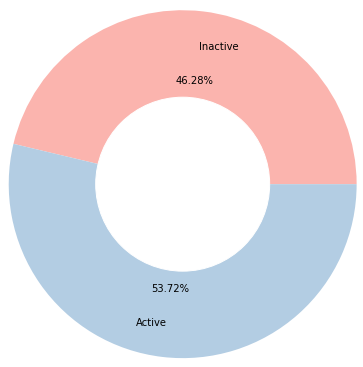

In [ ]:
# Create data
names = ['Inactive', 'Active']
size = [14712-7904,7904]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0),1.0,color='white')

# Label distance: gives the space between labels and the center of the pie
plt.pie(size,autopct='%.2f%%',labels=names,labeldistance=0.8,radius=2,colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

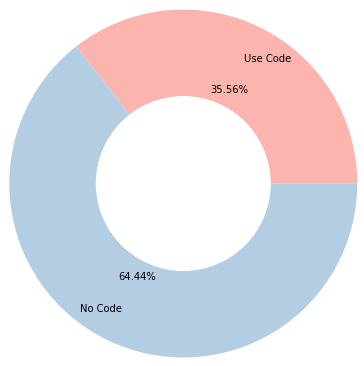

In [ ]:
# Create data
names = ['Use Code', 'No Code']
size = [0.355643,1-0.355643]
 
# Create a circle at the center of the plot
my_circle = plt.Circle((0,0),1.0,color='white')

# Label distance: gives the space between labels and the center of the pie
plt.pie(size,autopct='%.2f%%',labels=names,labeldistance=0.8,radius=2,colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

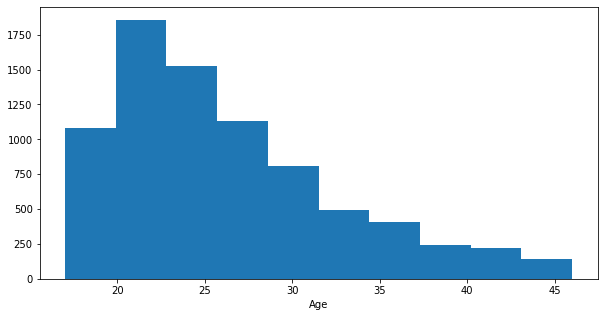

In [ ]:
df_user_end['user_age'].hist(figsize=(10,5),grid=False)
plt.xlabel('Age')
plt.show()

In [ ]:
occu = df_user_end.groupby('user_occupation')['user_id'].count().to_frame().reset_index()
occu

,user_occupation,user_id
0,Guru,49
1,IRT,380
2,Others,898
3,PNS,89
4,Pelajar,4473
5,Pengusaha,292
6,Swasta,1700
7,TNI/Polisi,23


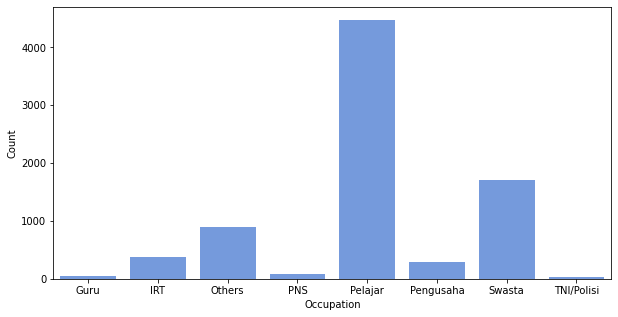

In [ ]:
# Bar Plot Number of Transaction per Month using SNS
fig, occu_sns= plt.subplots(figsize=(10,5))
occu_sns = sns.barplot (data=occu, x='user_occupation', y='user_id', color = 'cornflowerblue')

#Labelling
occu_sns.set_xlabel('Occupation')
occu_sns.set_ylabel('Count')

plt.show()

### Gender Based Analysis

In [ ]:
# Let's try group at the end of period by gender
df_user_end.groupby('user_gender').agg('sum')

,user_id,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,user_age,use_code
user_gender,,,,,,,,,,,,,,,
Female,10673977172,933534683,903560617,311619276,3522131429,3510482760,1692640074,3889921328,3874043651,1855839926,644837541,662568893,158676102,77312,973
Male,18270536337,1454993634,1409799487,516694958,2297046962,2291829283,662763074,4891529043,4883752450,3140560254,490828395,503434436,135023836,128366,1838


User Gender Grouped Result:

Female dominate the Pasar Uang investment and transaction amount by the end of the period, while male has higher number in other mutual funds type

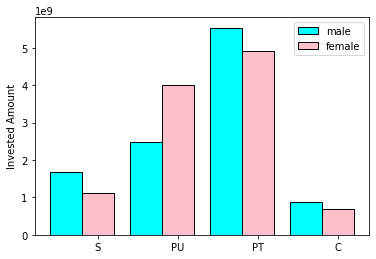

In [ ]:
# width of the bars
barWidth = 0.4
 
# Choose the height of the cyan bars
bars1 = [1669006889, 2488360440, 5535411623, 887333436]
 
# Choose the height of the pink bars
bars2 = [1115771585, 3995415014, 4900428621, 681768893]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color='cyan', edgecolor = 'black', capsize=7, label='male')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color='pink', edgecolor = 'black', capsize=7, label='female')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['S','PU','PT','C'])
plt.ylabel('Invested Amount')
plt.legend()
 
# Show graphic
plt.show()

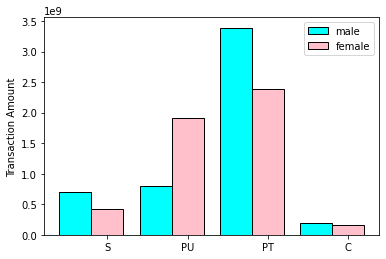

In [ ]:
# width of the bars
barWidth = 0.4
 
# Choose the height of the cyan bars
bars1 = [706890360, 793644231, 3389359427, 190872836]
 
# Choose the height of the pink bars
bars2 = [422334244, 1915614539, 2391514896, 162876102]

# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color='cyan', edgecolor = 'black', capsize=7, label='male')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color='pink', edgecolor = 'black', capsize=7, label='female')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['S','PU','PT','C'])
plt.ylabel('Transaction Amount')
plt.legend()
 
# Show graphic
plt.show()

## Time-series Analysis

### Invested Amount

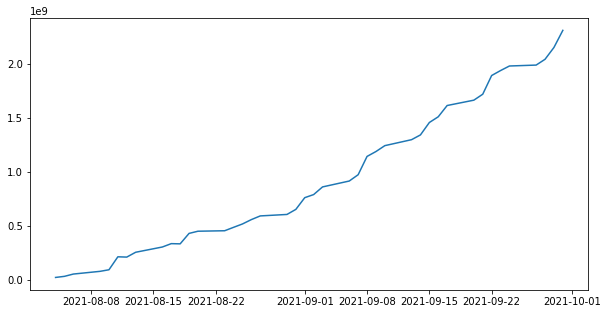

In [ ]:
# Time-series Saham
plt.figure(figsize=(10,5))
plt.plot('date','Saham_invested_amount',data=df_daily)

# show the graph
plt.show()

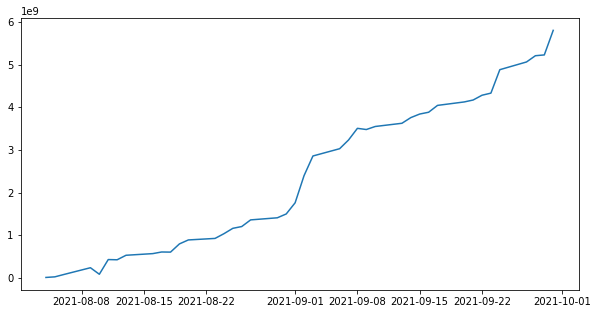

In [ ]:
# Time-series Pendapatan Uang
plt.figure(figsize=(10,5))
plt.plot('date','Pasar_Uang_invested_amount',data=df_daily)

# show the graph
plt.show()

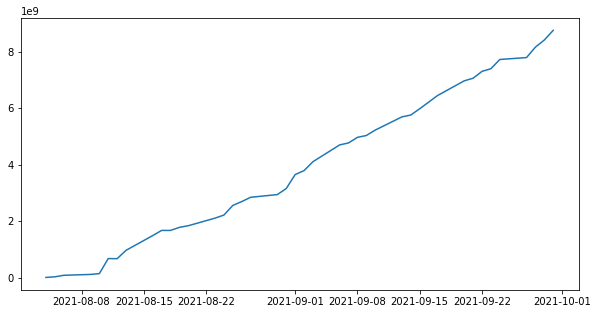

In [ ]:
# Time-series Pendapatan Uang
plt.figure(figsize=(10,5))
plt.plot('date','Pendapatan_Tetap_invested_amount',data=df_daily)

# show the graph
plt.show()

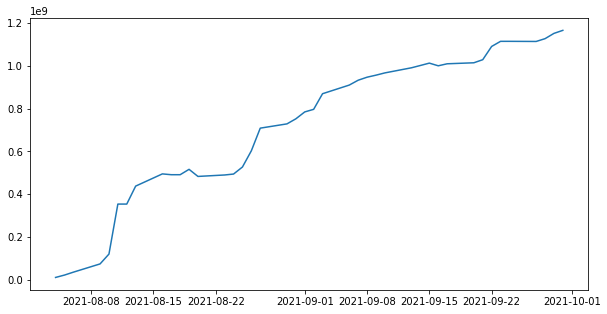

In [ ]:
# Time-series Pendapatan Uang
plt.figure(figsize=(10,5))
plt.plot('date','Campuran_invested_amount',data=df_daily)

# show the graph
plt.show()

### Transaction Amount

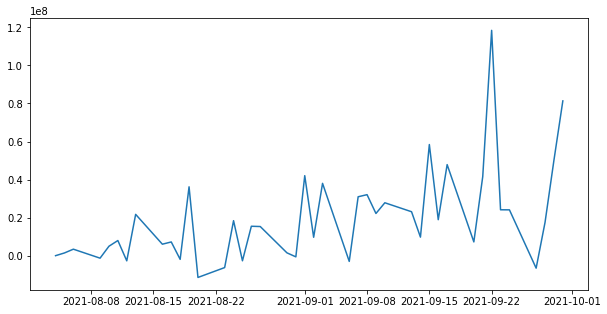

In [ ]:
# Time-series Saham
plt.figure(figsize=(10,5))
plt.plot('date','Saham_transaction_amount',data=df_daily)

# show the graph
plt.show()

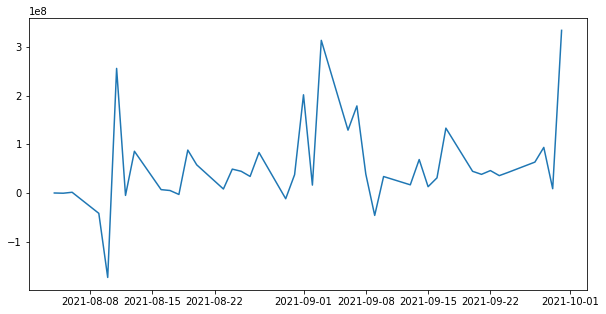

In [ ]:
# Time-series Pasar Uang
plt.figure(figsize=(10,5))
plt.plot('date','Pasar_Uang_transaction_amount',data=df_daily)

# show the graph
plt.show()

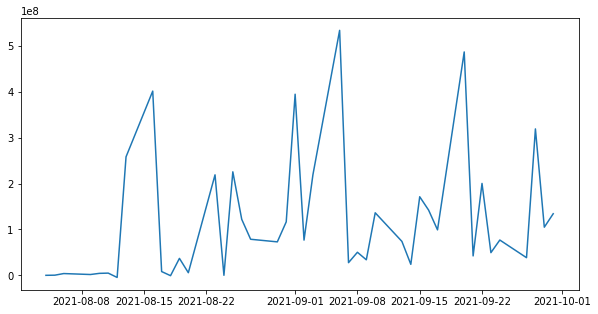

In [ ]:
# Time-series Pendapatan Tetap
plt.figure(figsize=(10,5))
plt.plot('date','Pendapatan_Tetap_transaction_amount',data=df_daily)

# show the graph
plt.show()

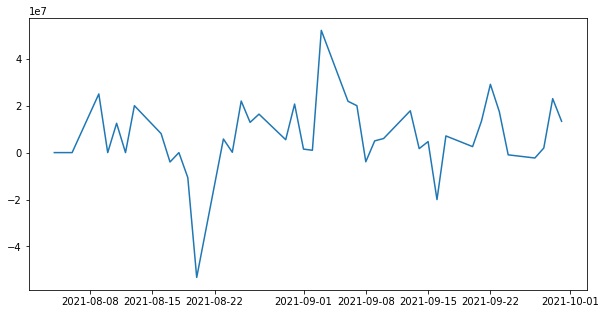

In [ ]:
# Time-series Campuran
plt.figure(figsize=(10,5))
plt.plot('date','Campuran_transaction_amount',data=df_daily)

# show the graph
plt.show()

### Transaction Count

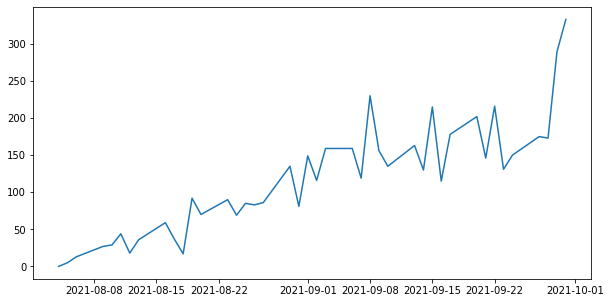

In [ ]:
# Time-series Saham
plt.figure(figsize=(10,5))
plt.plot('date','Saham_trans_count',data=df_daily)

# show the graph
plt.show()

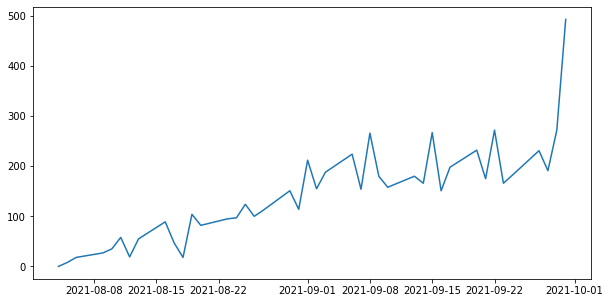

In [ ]:
# Time-series Saham
plt.figure(figsize=(10,5))
plt.plot('date','Pasar_Uang_trans_count',data=df_daily)

# show the graph
plt.show()

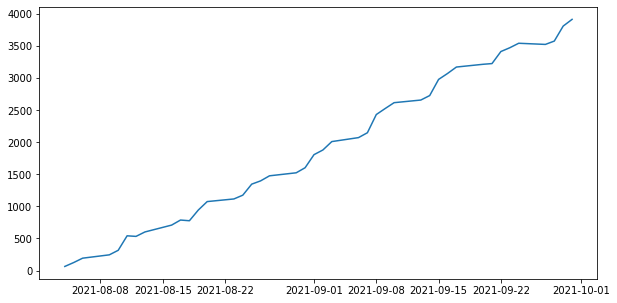

In [ ]:
# Time-series Saham
plt.figure(figsize=(10,5))
plt.plot('date','Pendapatan_Tetap_trans_count',data=df_daily)

# show the graph
plt.show()

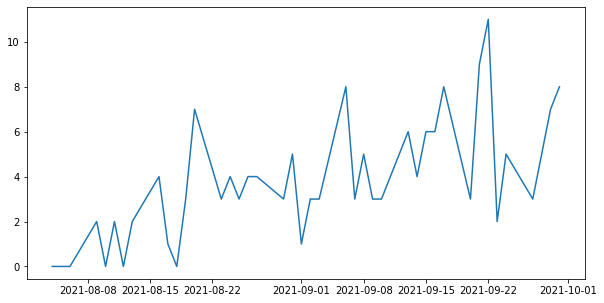

In [ ]:
# Time-series Saham
plt.figure(figsize=(10,5))
plt.plot('date','Campuran_trans_count',data=df_daily)

# show the graph
plt.show()

# Clustering (Kmeans)

## Preparation

In [ ]:
# Importing Library
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler     # to sacalling different attribute
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

In [ ]:
# Silhoutte Function
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

Using KMeans with Robust Scaling, we try to cluster the user End of Period data without removing outlier to capture all of our user who have high transaction count and amount.



In [ ]:
# Removing unnecessary collumn
df_user_end.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7904 entries, 0 to 7903
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   user_id                              7904 non-null   int64         
 1   date                                 7904 non-null   datetime64[ns]
 2   Saham_AUM                            7904 non-null   int64         
 3   Saham_invested_amount                7904 non-null   int64         
 4   Saham_transaction_amount             7904 non-null   int64         
 5   Pasar_Uang_AUM                       7904 non-null   int64         
 6   Pasar_Uang_invested_amount           7904 non-null   int64         
 7   Pasar_Uang_transaction_amount        7904 non-null   int64         
 8   Pendapatan_Tetap_AUM                 7904 non-null   int64         
 9   Pendapatan_Tetap_invested_amount     7904 non-null   int64         
 10  Pendapatan_T

In [ ]:
df_cluster = df_user_end[['user_id','Saham_transaction_amount','Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount',
                         'Campuran_transaction_amount','user_age','user_occupation','user_income_range','use_code']]
df_cluster

,user_id,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,user_age,user_occupation,user_income_range,use_code
0,50701,0,0,0,0,28,IRT,Rp 10 Juta - 50 Juta,0
1,50961,1300000,600000,1200000,0,33,Swasta,> Rp 100 Juta,0
2,53759,0,0,0,0,29,Swasta,< 10 Juta,0
3,54759,0,2000000,0,0,27,Swasta,> Rp 100 Juta,0
4,61414,-10000,0,0,0,26,Pelajar,< 10 Juta,0
...,...,...,...,...,...,...,...,...,...
7899,4165020,0,0,0,0,24,Others,< 10 Juta,1
7900,4165132,0,0,0,0,18,Pelajar,< 10 Juta,1
7901,4165630,0,0,0,0,28,Swasta,Rp 10 Juta - 50 Juta,0
7902,4165704,0,0,0,0,25,Swasta,Rp 10 Juta - 50 Juta,1


In [ ]:
# Adding transaction count per user per period
df_cluster = df[df['Saham_transaction_amount'] != 0].groupby('user_id').agg({'Saham_transaction_amount':'count'}).reset_index().rename({'Saham_transaction_amount': 'Saham_trans_count'}, axis=1).merge(df_cluster,how='right',left_on='user_id',right_on='user_id')
df_cluster = df[df['Pasar_Uang_transaction_amount'] != 0].groupby('user_id').agg({'Pasar_Uang_transaction_amount':'count'}).reset_index().rename({'Pasar_Uang_transaction_amount': 'Pasar_Uang_trans_count'}, axis=1).merge(df_cluster,how='right',left_on='user_id',right_on='user_id')
df_cluster = df[df['Pendapatan_Tetap_transaction_amount'] != 0].groupby('user_id').agg({'Pendapatan_Tetap_transaction_amount':'count'}).reset_index().rename({'Pendapatan_Tetap_transaction_amount': 'Pendapatan_Tetap_trans_count'}, axis=1).merge(df_cluster,how='right',left_on='user_id',right_on='user_id')
df_cluster = df[df['Campuran_transaction_amount'] != 0].groupby('user_id').agg({'Campuran_transaction_amount':'count'}).reset_index().rename({'Campuran_transaction_amount': 'Campuran_trans_count'}, axis=1).merge(df_cluster,how='right',left_on='user_id',right_on='user_id')

# Filling null value
df_cluster.fillna(value=0, inplace=True)

In [ ]:
# Doing one hot encoding for Income Range and Occupation
dum_df = pd.get_dummies(df_cluster, columns=['user_occupation','user_income_range'], prefix=['user_occupation','user_income_range'])
df_cluster = df_cluster.merge(dum_df)

In [ ]:
df_cluster = df_cluster.assign(
    Total_transaction_amount = df_cluster['Saham_transaction_amount']+df_cluster['Pasar_Uang_transaction_amount']+df_cluster['Pendapatan_Tetap_transaction_amount']+df_cluster['Campuran_transaction_amount'],
    Total_transaction_count = df_cluster['Saham_trans_count']+df_cluster['Pasar_Uang_trans_count']+df_cluster['Pendapatan_Tetap_trans_count']+df_cluster['Campuran_trans_count']
)
df_cluster = df_cluster[df_cluster['Total_transaction_count'] != 0]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4603 entries, 1 to 7834
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   user_id                                    4603 non-null   int64  
 1   Campuran_trans_count                       4603 non-null   float64
 2   Pendapatan_Tetap_trans_count               4603 non-null   float64
 3   Pasar_Uang_trans_count                     4603 non-null   float64
 4   Saham_trans_count                          4603 non-null   float64
 5   Saham_transaction_amount                   4603 non-null   int64  
 6   Pasar_Uang_transaction_amount              4603 non-null   int64  
 7   Pendapatan_Tetap_transaction_amount        4603 non-null   int64  
 8   Campuran_transaction_amount                4603 non-null   int64  
 9   user_age                                   4603 non-null   int64  
 10  user_occupation         

In [ ]:
numerical_column = ['Campuran_trans_count','Pendapatan_Tetap_trans_count','Pasar_Uang_trans_count','Saham_trans_count','Saham_transaction_amount',
                    'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount','user_age','Total_transaction_amount','Total_transaction_count']
scaler = RobustScaler()
df_cn = df_cluster.copy()
df_cn[numerical_column] = scaler.fit_transform(df_cn[numerical_column])
df_cn

,user_id,Campuran_trans_count,Pendapatan_Tetap_trans_count,Pasar_Uang_trans_count,Saham_trans_count,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,user_age,...,user_occupation_Pelajar,user_occupation_Pengusaha,user_occupation_Swasta,user_occupation_TNI/Polisi,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,Total_transaction_amount,Total_transaction_count
1,50961,0.0,0.0,0.0,1.0,26.0,8.571429,21.818182,0.0,1.000000,...,0,0,1,0,0,1,0,0,7.6875,0.333333
3,54759,0.0,-0.5,0.0,-1.0,0.0,28.571429,0.000000,0.0,0.333333,...,0,0,1,0,0,1,0,0,4.9375,-0.666667
4,61414,0.0,-0.5,-0.5,0.0,-0.2,0.000000,0.000000,0.0,0.222222,...,1,0,0,0,1,0,0,0,-0.0875,-0.666667
5,66145,0.0,-0.5,-0.5,0.0,2.8,0.000000,0.000000,0.0,1.000000,...,0,0,1,0,0,1,0,0,0.2875,-0.666667
6,67251,0.0,0.0,0.0,0.0,10.6,1.428571,6.727273,0.0,0.555556,...,0,0,0,0,0,0,0,1,2.4375,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,4154421,0.0,-0.5,0.0,-1.0,0.0,-0.142857,0.000000,0.0,-0.666667,...,0,0,0,0,1,0,0,0,-0.0875,-0.666667
7808,4154865,0.0,-0.5,0.0,-1.0,0.0,-0.142857,0.000000,0.0,-0.333333,...,0,0,0,0,0,0,1,0,-0.0875,-0.666667
7813,4155060,0.0,-0.5,0.0,-1.0,0.0,0.285714,0.000000,0.0,-0.555556,...,0,0,0,0,1,0,0,0,-0.0125,-0.666667
7832,4157054,0.0,-0.5,0.0,-1.0,0.0,-0.142857,0.000000,0.0,2.444444,...,0,0,0,0,0,0,0,1,-0.0875,-0.666667


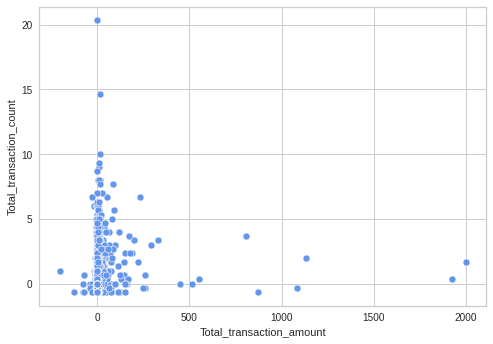

In [ ]:
sns.scatterplot (data = df_cn, x='Total_transaction_amount', y='Total_transaction_count', color = 'cornflowerblue')

In [ ]:
# del df_cluster

## Analysis

In [ ]:
# Removing unused columns 
df_c = df_cn.drop(columns=['Campuran_trans_count','Pendapatan_Tetap_trans_count','Pasar_Uang_trans_count','Saham_trans_count','user_id','user_occupation','user_income_range','Saham_transaction_amount',
                    'Pasar_Uang_transaction_amount','Pendapatan_Tetap_transaction_amount','Campuran_transaction_amount','Total_transaction_amount'])
df_c.columns

Index(['user_age', 'use_code', 'user_occupation_Guru', 'user_occupation_IRT',
       'user_occupation_Others', 'user_occupation_PNS',
       'user_occupation_Pelajar', 'user_occupation_Pengusaha',
       'user_occupation_Swasta', 'user_occupation_TNI/Polisi',
       'user_income_range_< 10 Juta', 'user_income_range_> Rp 100 Juta',
       'user_income_range_> Rp 50 Juta - 100 Juta',
       'user_income_range_Rp 10 Juta - 50 Juta', 'Total_transaction_count'],
      dtype='object')

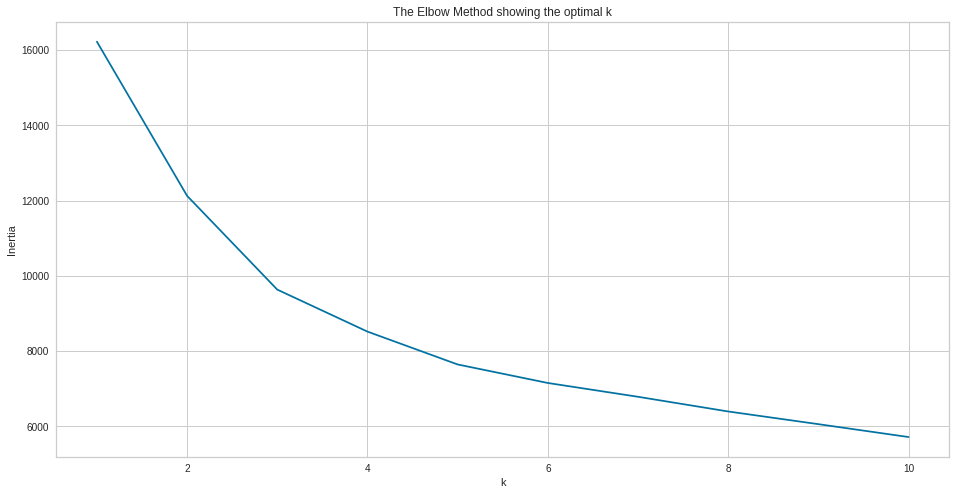

In [ ]:
# Elbow Method with cluster range 2-10
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df_c)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.41407395184228873
For n_clusters = 3 The average silhouette_score is : 0.2707509764679182
For n_clusters = 4 The average silhouette_score is : 0.23547168115775632
For n_clusters = 5 The average silhouette_score is : 0.23824301195256573
For n_clusters = 6 The average silhouette_score is : 0.23706578000670933


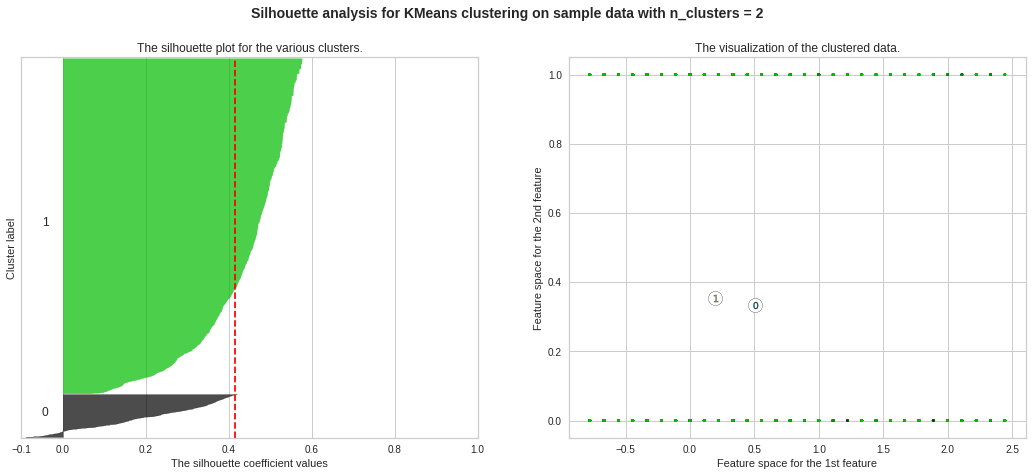

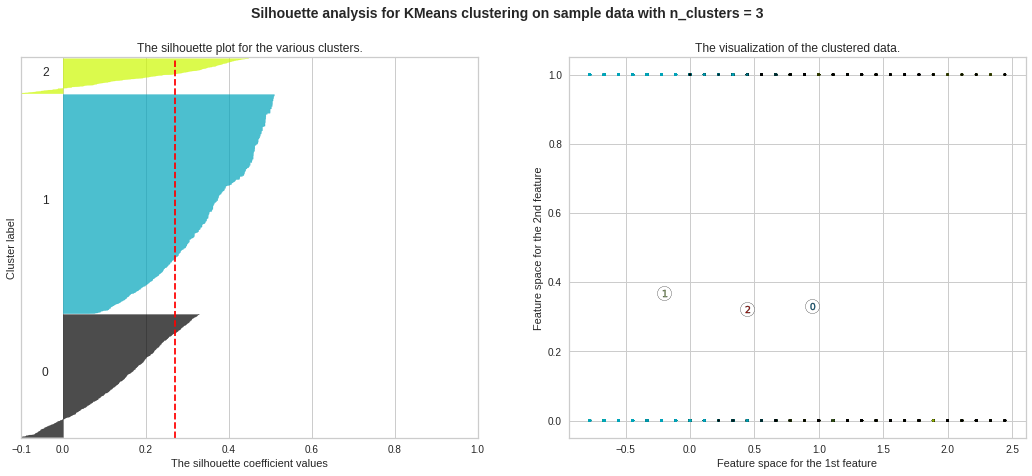

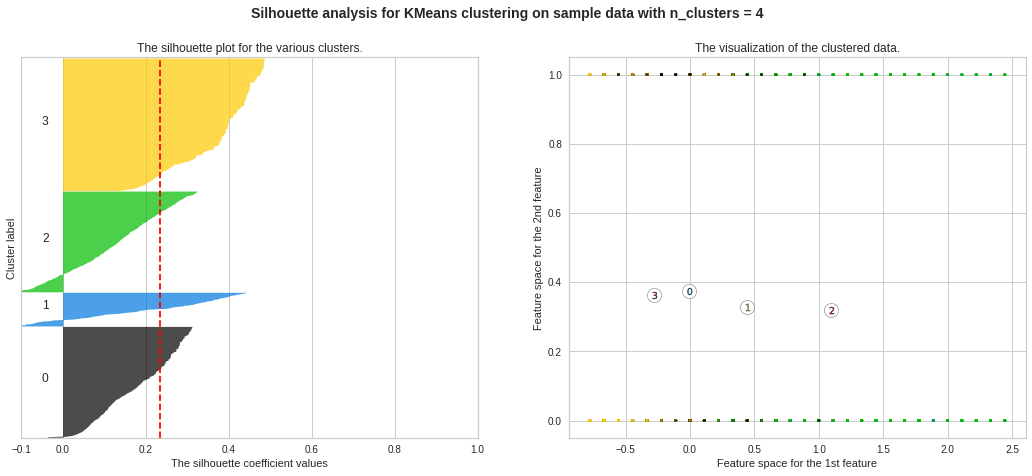

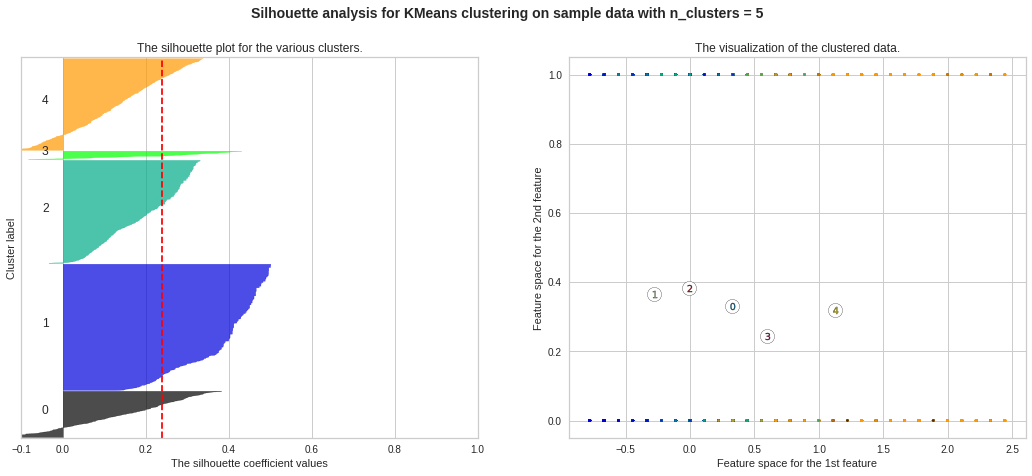

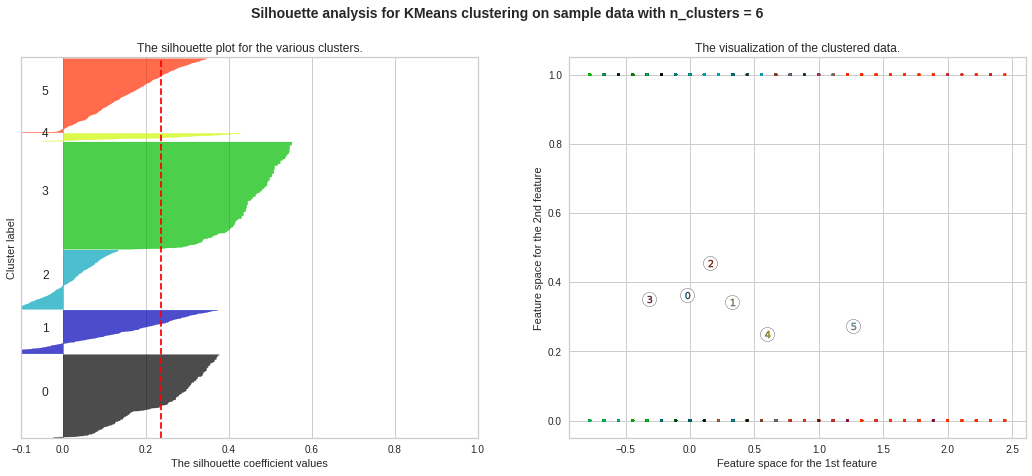

In [ ]:
silhoutte_analysis(df_c,list(range(2,7)))

From the Elbow Method, Silhoutte Analysis, and Scatter Plot, we'll take k = 4 as the number of cluster we're going to use.

In [ ]:
cluster_model = cluster.KMeans(n_clusters=4)
cluster_model.fit(df_c)
cluster_label = cluster_model.labels_
df_cluster['cluster'] = cluster_label
df_cluster

,user_id,Campuran_trans_count,Pendapatan_Tetap_trans_count,Pasar_Uang_trans_count,Saham_trans_count,Saham_transaction_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_transaction_amount,Campuran_transaction_amount,user_age,...,user_occupation_Pengusaha,user_occupation_Swasta,user_occupation_TNI/Polisi,user_income_range_< 10 Juta,user_income_range_> Rp 100 Juta,user_income_range_> Rp 50 Juta - 100 Juta,user_income_range_Rp 10 Juta - 50 Juta,Total_transaction_amount,Total_transaction_count,cluster
1,50961,0.0,1.0,1.0,2.0,1300000,600000,1200000,0,33,...,0,1,0,0,1,0,0,3100000,4.0,0
3,54759,0.0,0.0,1.0,0.0,0,2000000,0,0,27,...,0,1,0,0,1,0,0,2000000,1.0,0
4,61414,0.0,0.0,0.0,1.0,-10000,0,0,0,26,...,0,0,0,1,0,0,0,-10000,1.0,1
5,66145,0.0,0.0,0.0,1.0,140000,0,0,0,33,...,0,1,0,0,1,0,0,140000,1.0,0
6,67251,0.0,1.0,1.0,1.0,530000,100000,370000,0,29,...,0,0,0,0,0,0,1,1000000,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,4154421,0.0,0.0,1.0,0.0,0,-10000,0,0,18,...,0,0,0,1,0,0,0,-10000,1.0,1
7808,4154865,0.0,0.0,1.0,0.0,0,-10000,0,0,21,...,0,0,0,0,0,1,0,-10000,1.0,2
7813,4155060,0.0,0.0,1.0,0.0,0,20000,0,0,19,...,0,0,0,1,0,0,0,20000,1.0,1
7832,4157054,0.0,0.0,1.0,0.0,0,-10000,0,0,46,...,0,0,0,0,0,0,1,-10000,1.0,0


In [ ]:
df_cluster.groupby('cluster')['user_id'].agg(['count'])

,count
cluster,
0,1225
1,1618
2,1354
3,406


In [ ]:
df_cluster.groupby(['cluster'])['user_income_range'].describe()

,count,unique,top,freq
cluster,,,,
0,1225,4,Rp 10 Juta - 50 Juta,396
1,1618,1,< 10 Juta,1618
2,1354,3,Rp 10 Juta - 50 Juta,971
3,406,4,Rp 10 Juta - 50 Juta,139


In [ ]:
df_cluster.groupby(['cluster'])['user_occupation'].describe()

,count,unique,top,freq
cluster,,,,
0,1225,8,Swasta,793
1,1618,8,Pelajar,1373
2,1354,8,Pelajar,1084
3,406,8,Pelajar,188


In [ ]:
df_cluster.groupby(['cluster'])['user_age'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1225,33.859592,33.0,46,21
1,1618,21.461063,21.0,34,17
2,1354,23.951256,24.0,36,17
3,406,27.967980,27.0,46,17


In [ ]:
df_cluster.groupby(['cluster'])['Total_transaction_amount'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1225,3.379622e+06,100000.0,799000751,-50000000
1,1618,1.593232e+05,0.0,20000000,-10000000
2,1354,9.953084e+05,25000.0,350000000,-80750000
3,406,6.720069e+06,710794.5,452950000,-9977606


In [ ]:
df_cluster.groupby(['cluster'])['Total_transaction_count'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,1225,2.998367,3.0,9.0,1.0
1,1618,2.605686,2.0,8.0,1.0
2,1354,2.550222,2.0,8.0,1.0
3,406,12.532020,11.0,64.0,8.0


After doing KMeans clustering multiple times, it didn't give an insightful result, we might have to do Clustering using RFM

# Clustering (RFM)

credits: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/


## RFM Model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151541 entries, 0 to 158810
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              151541 non-null  int64         
 1   date                                 151541 non-null  datetime64[ns]
 2   Saham_AUM                            151541 non-null  int64         
 3   Saham_invested_amount                151541 non-null  int64         
 4   Saham_transaction_amount             151541 non-null  int64         
 5   Pasar_Uang_AUM                       151541 non-null  int64         
 6   Pasar_Uang_invested_amount           151541 non-null  int64         
 7   Pasar_Uang_transaction_amount        151541 non-null  int64         
 8   Pendapatan_Tetap_AUM                 151541 non-null  int64         
 9   Pendapatan_Tetap_invested_amount     151541 non-null  int64         
 

In [ ]:
# Making a Recency Table
df_recency = df[(df['Saham_transaction_amount'] != 0) | (df['Pasar_Uang_transaction_amount'] != 0) | (df['Pendapatan_Tetap_transaction_amount'] != 0) | (df['Campuran_transaction_amount'] != 0)]
# df_recency = dfr1.merge(dfr2,how='outer',on='user_id')
df_recency

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,...,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,user_income_source,use_code
25,50961,2021-09-01,1705566,1700000,1000000,100065,100000,0,200124,200000,...,0,0,0,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta,Gaji,0
46,50961,2021-09-30,2063909,2000000,300000,700603,700000,600000,1398998,1400000,...,0,0,0,2021-08-20 16:22:29,Female,33,Swasta,> Rp 100 Juta,Gaji,0
99,54759,2021-09-30,0,0,0,12049049,12000000,2000000,0,0,...,0,0,0,2021-08-11 21:16:05,Male,27,Swasta,> Rp 100 Juta,Gaji,0
102,61414,2021-08-13,0,0,-10000,0,0,0,0,0,...,0,0,0,2021-08-08 21:26:04,Male,26,Pelajar,< 10 Juta,Tabungan,0
154,66145,2021-09-29,248015,240000,140000,29992,30000,0,129929,130000,...,0,0,0,2021-09-02 09:30:31,Female,33,Swasta,> Rp 100 Juta,Gaji,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158687,4154421,2021-09-30,0,0,0,0,0,-10000,0,0,...,0,0,0,2021-09-27 00:09:14,Female,18,Others,< 10 Juta,Gaji,1
158692,4154865,2021-09-30,0,0,0,0,0,-10000,0,0,...,0,0,0,2021-09-27 01:47:37,Male,21,Others,> Rp 50 Juta - 100 Juta,Gaji,1
158701,4155060,2021-09-30,62318,60000,0,40007,40000,20000,117016,120000,...,0,0,0,2021-09-27 02:53:51,Female,19,Others,< 10 Juta,Dari Orang Tua / Anak,0
158734,4157054,2021-09-30,0,0,0,0,0,-10000,0,0,...,0,0,0,2021-09-27 11:48:50,Female,46,IRT,Rp 10 Juta - 50 Juta,Keuntungan Bisnis,1


In [ ]:
df_recency = df_recency.groupby(by='user_id',
                        as_index=False)['date'].max()
df_recency.columns = ['user_id', 'LastTransactionDate']
recent_date = df_recency['LastTransactionDate'].max()
df_recency['Recency'] = df_recency['LastTransactionDate'].apply(
    lambda x: (recent_date - x).days)
df_recency

,user_id,LastTransactionDate,Recency
0,50961,2021-09-30,0
1,54759,2021-09-30,0
2,61414,2021-08-13,48
3,66145,2021-09-29,1
4,67251,2021-09-20,10
...,...,...,...
4598,4154421,2021-09-30,0
4599,4154865,2021-09-30,0
4600,4155060,2021-09-30,0
4601,4157054,2021-09-30,0


In [ ]:
# Making a frequency table
df_frequency = df_cluster[['user_id', 'Total_transaction_count']]
df_frequency.columns = ['user_id', 'Frequency']
df_frequency['Frequency'] = df_frequency['Frequency'].astype(int)
df_frequency

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,user_id,Frequency
1,50961,4
3,54759,1
4,61414,1
5,66145,1
6,67251,3
...,...,...
7805,4154421,1
7808,4154865,1
7813,4155060,1
7832,4157054,1


In [ ]:
# Making a monetary table
df_monetary = df_cluster[['user_id', 'Total_transaction_amount']]
df_monetary.columns = ['user_id', 'Monetary']
df_monetary

,user_id,Monetary
1,50961,3100000
3,54759,2000000
4,61414,-10000
5,66145,140000
6,67251,1000000
...,...,...
7805,4154421,-10000
7808,4154865,-10000
7813,4155060,20000
7832,4157054,-10000


In [ ]:
# RFM Table 
rf_df = df_recency.merge(df_frequency, on='user_id')
rfm_df = rf_df.merge(df_monetary, on='user_id').drop(
    columns='LastTransactionDate')
rfm_df.head()

,user_id,Recency,Frequency,Monetary
0,50961,0,4,3100000
1,54759,0,1,2000000
2,61414,48,1,-10000
3,66145,1,1,140000
4,67251,10,3,1000000


In [ ]:
# Ranking customer based on RFM
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,user_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,50961,0,4,3100000,100.000000,71.529437,71.529437
1,54759,0,1,2000000,100.000000,17.162720,17.162720
2,61414,48,1,-10000,2.140239,17.162720,17.162720
3,66145,1,1,140000,87.253163,17.162720,17.162720
4,67251,10,3,1000000,53.553269,56.799913,56.799913


In [ ]:
# Calculating RFM Score with weighted value
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['user_id', 'RFM_Score']].head()

,user_id,RFM_Score
0,50961,3.79
1,54759,1.48
2,61414,0.75
3,66145,1.38
4,67251,2.82


In [ ]:
rfm_df["Cluster"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['user_id', 'RFM_Score', 'Cluster']]

,user_id,RFM_Score,Cluster
0,50961,3.79,Medium Value Customer
1,54759,1.48,Lost Customers
2,61414,0.75,Lost Customers
3,66145,1.38,Lost Customers
4,67251,2.82,Low Value Customers
...,...,...,...
4598,4154421,1.48,Lost Customers
4599,4154865,1.48,Lost Customers
4600,4155060,1.48,Lost Customers
4601,4157054,1.48,Lost Customers


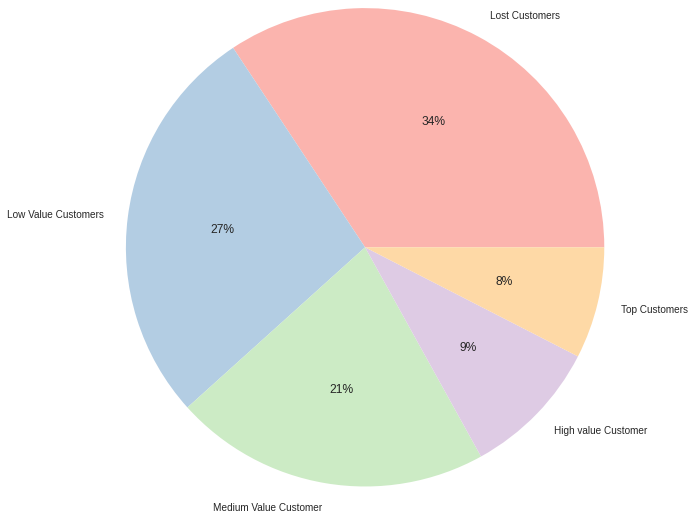

In [ ]:
plt.pie(rfm_df.Cluster.value_counts(),colors=Pastel1_7.hex_colors,radius=2,
        labels=rfm_df.Cluster.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
clustered_df = rfm_df.merge(df_cluster,how='left',on='user_id')
clustered_df = clustered_df.merge(user[['user_id','user_gender']],how='left',on='user_id')

In [ ]:
clustered_df.groupby(['user_income_range','Cluster',])['user_occupation'].describe()

count unique      top freq
user_income_range       Cluster                                         
< 10 Juta               High value Customer     162      6  Pelajar  119
                        Lost Customers          718      8  Pelajar  519
                        Low Value Customers     565      8  Pelajar  436
                        Medium Value Customer   407      8  Pelajar  312
                        Top Customers           104      6  Pelajar   77
> Rp 100 Juta           High value Customer      44      6   Swasta   20
                        Lost Customers          110      6   Swasta   44
                        Low Value Customers      86      7   Swasta   48
                        Medium Value Customer    98      6   Swasta   48
                        Top Customers            50      6   Swasta   18
> Rp 50 Juta - 100 Juta High value Customer      88      7  Pelajar   40
                        Lost Customers          214      7  Pelajar   92
                        Low Value Customers     210      7  Pelajar   93
                        Medium Value Customer   168      8  Pelajar   64
                        Top Customers            73      6   Swasta   33
Rp 10 Juta - 50 Juta    High value Customer     139      6  Pelajar   67
                        Lost Customers          537      7  Pelajar  282
                        Low Value Customers     399      8  Pelajar  236
                        Medium Value Customer   311      7  Pelajar  162
                        Top Customers           120      8  Pelajar   45

Although not perfect, RFM represent the clustering better for this business case. There might still be improvement that can be done.

In [ ]:
clustered_df.groupby('Cluster')['user_income_range'].describe()

,count,unique,top,freq
Cluster,,,,
High value Customer,433,4,< 10 Juta,162
Lost Customers,1579,4,< 10 Juta,718
Low Value Customers,1260,4,< 10 Juta,565
Medium Value Customer,984,4,< 10 Juta,407
Top Customers,347,4,Rp 10 Juta - 50 Juta,120


In [ ]:
clustered_df.groupby(['Cluster','user_occupation'])['user_age'].agg(['count','mean','median','max','min'])

count       mean  median  max  min
Cluster               user_occupation                                    
High value Customer   Guru                 3  37.333333    39.0   43   30
                      IRT                 22  32.363636    31.5   45   22
                      Others              44  28.159091    27.5   44   17
                      PNS                  8  34.500000    33.5   42   24
                      Pelajar            233  22.622318    22.0   35   17
                      Pengusaha           14  36.214286    36.5   46   28
                      Swasta             109  31.752294    31.0   45   18
Lost Customers        Guru                 7  33.142857    32.0   40   27
                      IRT                 68  32.073529    31.0   46   20
                      Others             206  27.121359    26.0   44   17
                      PNS                 15  34.000000    37.0   44   24
                      Pelajar            924  22.063853    21.0   42   17
                      Pengusaha           59  31.593220    30.0   46   19
                      Swasta             298  31.563758    31.0   46   17
                      TNI/Polisi           2  29.000000    29.0   30   28
Low Value Customers   Guru                 9  27.555556    28.0   41   21
                      IRT                 45  32.266667    31.0   44   23
                      Others             101  25.524752    24.0   42   17
                      PNS                 15  34.200000    35.0   46   27
                      Pelajar            781  22.516005    22.0   37   17
                      Pengusaha           48  32.145833    32.0   44   22
                      Swasta             258  32.251938    32.0   46   18
                      TNI/Polisi           3  33.666667    37.0   39   25
Medium Value Customer Guru                 2  32.500000    32.5   34   31
                      IRT                 36  33.500000    31.0   45   23
                      Others              92  26.967391    27.0   44   17
                      PNS                 18  35.055556    36.0   43   25
                      Pelajar            568  22.690141    22.0   38   17
                      Pengusaha           25  32.080000    33.0   45   22
                      Swasta             236  32.470339    32.0   46   19
                      TNI/Polisi           7  30.428571    29.0   44   21
Top Customers         Guru                 5  27.000000    27.0   30   25
                      IRT                 15  34.733333    36.0   44   26
                      Others              46  29.869565    28.0   46   19
                      PNS                 11  37.909091    37.0   45   29
                      Pelajar            152  23.000000    22.0   33   17
                      Pengusaha           16  34.250000    33.0   46   23
                      Swasta             101  33.366337    33.0   45   20
                      TNI/Polisi           1  33.000000    33.0   33   33

In [ ]:
clustered_df.groupby(['Cluster'])['Total_transaction_count'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
Cluster,,,,,
High value Customer,433,7.207852,7.0,18.0,5.0
Lost Customers,1579,1.000000,1.0,1.0,1.0
Low Value Customers,1260,2.541270,3.0,3.0,2.0
Medium Value Customer,984,4.246951,4.0,9.0,3.0
Top Customers,347,12.533141,11.0,64.0,7.0


In [ ]:
clustered_df.groupby(['Cluster'])['Recency'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
Cluster,,,,,
High value Customer,433,7.515012,6.0,36,0
Lost Customers,1579,16.635212,14.0,56,0
Low Value Customers,1260,17.363492,15.0,55,0
Medium Value Customer,984,11.564024,8.0,52,0
Top Customers,347,1.561960,0.0,14,0


In [ ]:
clustered_df.groupby(['Cluster'])['user_gender'].describe()

,count,unique,top,freq
Cluster,,,,
High value Customer,433,2,Male,267
Lost Customers,1579,2,Male,990
Low Value Customers,1260,2,Male,805
Medium Value Customer,984,2,Male,604
Top Customers,347,2,Male,220
